# Set up the working directory and enviroment

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import os
os.chdir("/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/NGN2/pool2_hNGN2")

In [5]:
!pwd

/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/NGN2/pool2_hNGN2


## Assign folders for storing input data, object, and output
1. 'data' folder: storing .mtx or h5 from 10xGenomic sequencing 
2. 'interim' folder: storing h5ad object after processing and its output files, e.g., top_markers.csv
3. 'figures' folder: automatically generated

In [9]:
%ls -lth

total 52M
-rw------- 1 root root 4.1M Oct 21 20:05 scanpy_pool2_neuron_hNGN2_check_PNS.ipynb
-rw------- 1 root root 4.8M Oct 21 19:57 scanpy_pool2_neuron_hNGN2.ipynb
-rw------- 1 root root 3.0K May 13 16:38 no_vireo_yet_demultiplexing_wholeset_concise.py
drwx------ 2 root root 4.0K May 11 21:07 vireo/
drwx------ 2 root root 4.0K May 11 21:06 cellSNP/
drwx------ 2 root root 4.0K Apr 16  2020 scanpy_out/
-rw------- 1 root root 8.0M Apr 16  2020 web_summary.html
drwx------ 2 root root 4.0K Apr 16  2020 analysis_10xgenomics/
drwx------ 2 root root 4.0K Apr 16  2020 filtered_feature_bc_matrix/
-rw------- 1 root root  35M Apr 16  2020 filtered_feature_bc_matrix.h5


In [10]:
%ls -lth scanpy_out/

total 1.3G
-rw------- 1 root root 308M May 13 18:45 pool2_hNGN2.h5ad
-rw------- 1 root root 980M May 13 18:44 pool2_hNGN2_wholeset.h5ad
-rw------- 1 root root  23K Apr 16  2020 top_markers_pool2_neurons_hNGN2_HVG.csv
-rw------- 1 root root  27K Apr 16  2020 top_markers_pool2_neurons_hNGN2.csv
-rw------- 1 root root  27K Apr 16  2020 top_markers_pool1_neurons_hNGN2.csv


## Installed the required packages

In [ ]:
# required for umap clustering
! pip3 install leidenalg 
! pip3 install scanpy
# ! pip install python-igraph
# ! pip install louvain
import h5py
import numpy as np
import pandas as pd
import scanpy as sc

## Set up the displaying and print parameters

In [14]:
sc.settings.verbosity = 3 
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

## Visualize the clusters

In [11]:
adata=sc.read_h5ad("scanpy_out/pool2_hNGN2.h5ad")

/usr/local/lib/python3.6/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


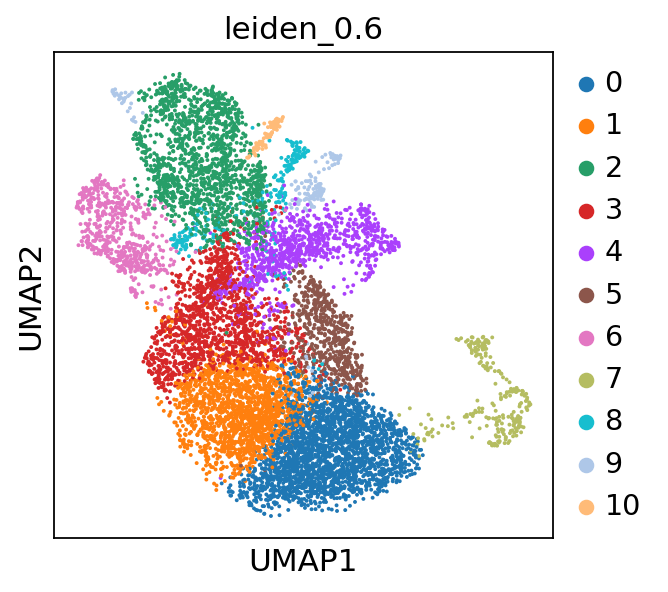

In [15]:
sc.pl.umap(adata, color=['leiden_0.6'])

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


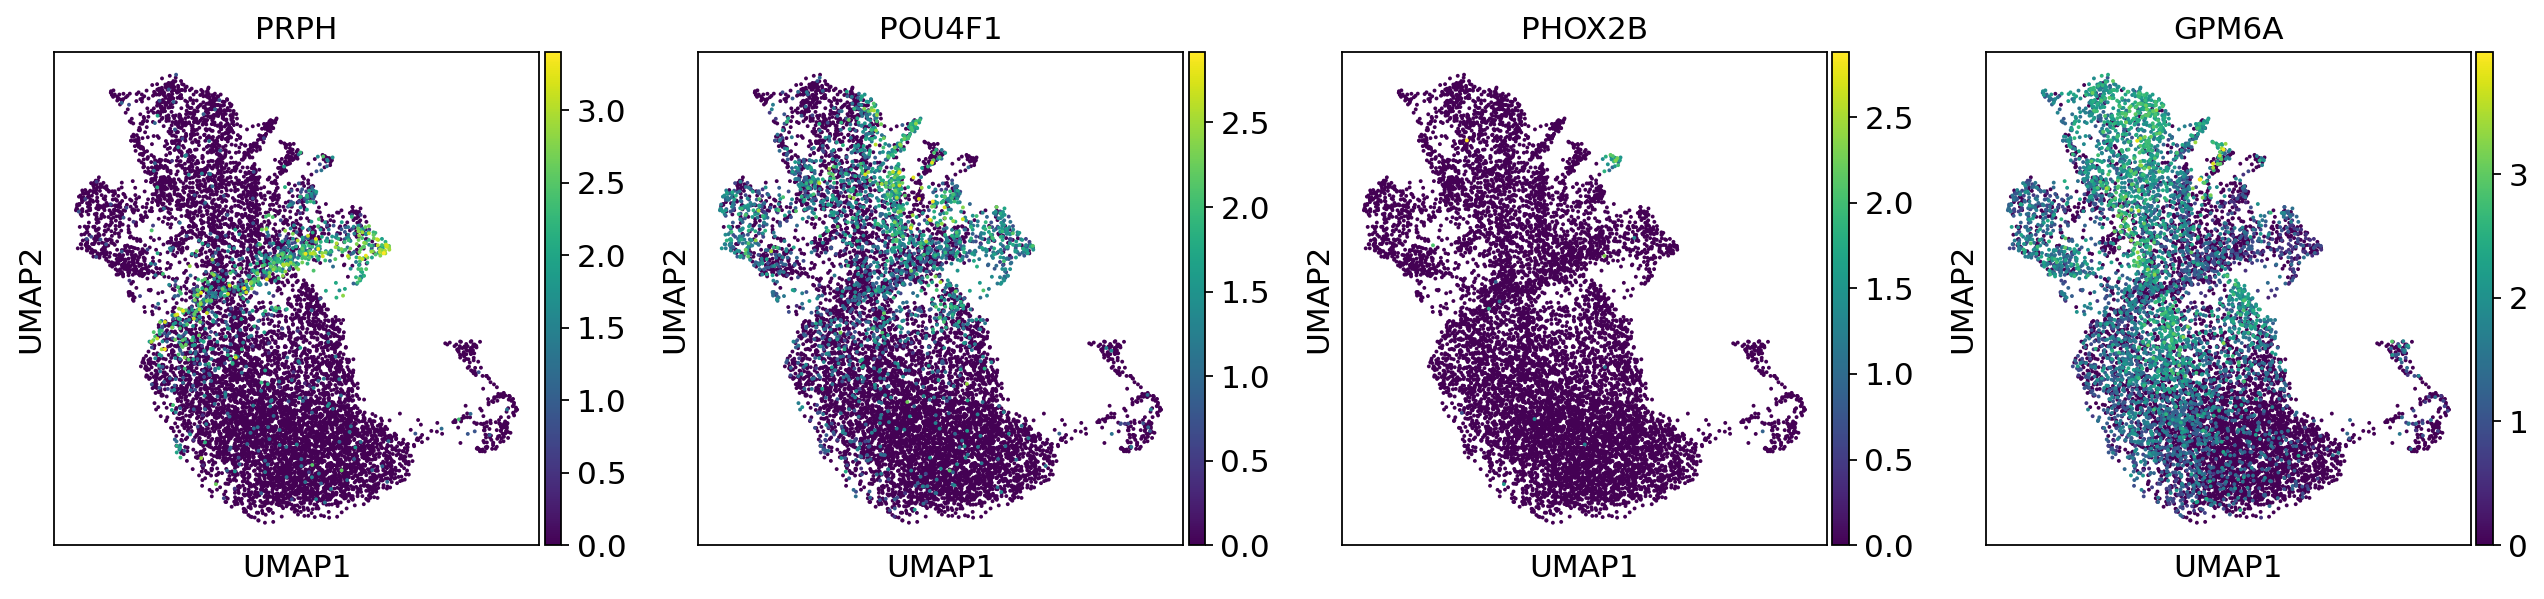

In [17]:
sc.pl.umap(adata, color=['PRPH', 'POU4F1', 'PHOX2B','GPM6A'])

In [22]:
# Get the expression from PRPH
adata.var.head()

,gene_ids,feature_types,genome,n_cells,highly_variable,means,dispersions,dispersions_norm
LINC00115,ENSG00000225880,Gene Expression,GRCh38,174,True,0.036568,1.385701,1.678730
FAM41C,ENSG00000230368,Gene Expression,GRCh38,75,True,0.014130,1.074266,0.636763
AL645608.8,ENSG00000272512,Gene Expression,GRCh38,295,True,0.062376,1.074567,0.637771
HES4,ENSG00000188290,Gene Expression,GRCh38,4847,True,1.020260,1.574627,2.664576
AGRN,ENSG00000188157,Gene Expression,GRCh38,2890,True,0.501757,1.039082,0.731035


In [24]:
prph = adata.var.loc["PRPH",:]

In [25]:
prph

gene_ids            ENSG00000135406
feature_types       Gene Expression
genome                       GRCh38
n_cells                        1041
highly_variable                True
means                      0.472549
dispersions                 2.31032
dispersions_norm            9.16142
Name: PRPH, dtype: object

In [27]:
1041/9775

0.10649616368286445

In [26]:
adata

AnnData object with n_obs × n_vars = 9775 × 2742
    obs: 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'leiden_0.4', 'leiden_0.6'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'leiden_0.6_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## Save the processed adata object saved as .h5ad
The object can be load using adata = sc.read(results_file)

In [ ]:
adata.write(results_file)

## Annotate cell types for all the clusters 
Based on domain knowledge and information of marker genes

Wait for disscussion for this case


# Visulize gene differential expression 
maker genes or other gene of interest


/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


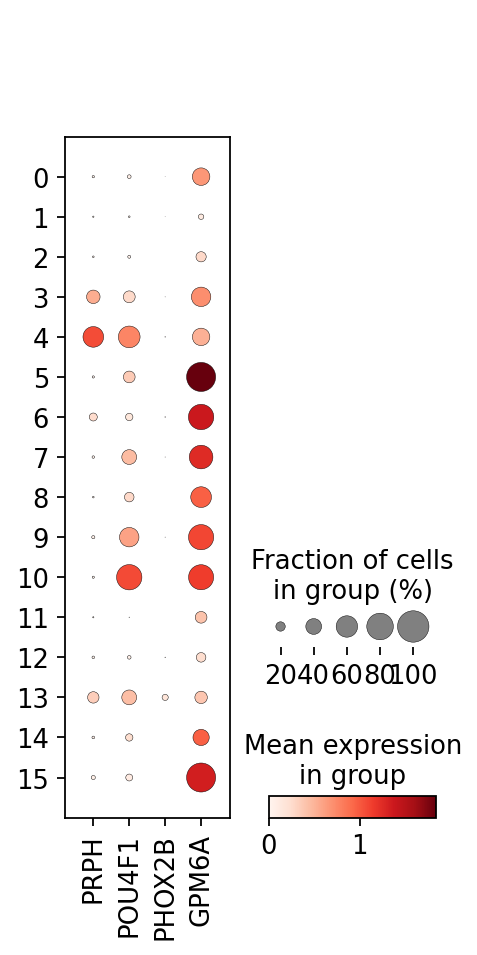

In [18]:
ax = sc.pl.dotplot(adata, ['PRPH', 'POU4F1', 'PHOX2B','GPM6A'], groupby='leiden')